# CICIDDOS2019 Dataset Analysis
## Phase 2: Data Exploration and Preprocessing

This notebook provides comprehensive analysis of the CICIDDOS2019 dataset for our federated learning DDoS detection project.

### Objectives:
1. Load and explore the CICIDDOS2019 dataset
2. Perform data cleaning and preprocessing
3. Analyze features and their relevance for DDoS detection
4. Visualize data distributions and attack patterns
5. Prepare data for federated learning simulation

---

In [2]:
# Import Required Libraries
import sys
import os
sys.path.append('../src')

# Data manipulation and analysis
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Machine learning and preprocessing
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.feature_selection import SelectKBest, f_classif

# Custom modules
from data.data_loader import CICDDoS2019Loader
from data.preprocessing import DataPreprocessor
from data.federated_split import FederatedDataDistributor

# Warnings
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("✅ All libraries imported successfully!")

✅ All libraries imported successfully!


## 1. Load CICIDDOS2019 Dataset

Let's start by loading the dataset and exploring its basic structure.

In [ ]:
# Load the optimized dataset we just created
print("📊 CICIDDOS2019 Optimized Dataset Analysis")
print("=" * 50)

import os
import pandas as pd

# Check if optimized dataset exists
optimized_path = "../data/optimized/optimized_dataset.csv"
print(f"Checking for dataset at: {optimized_path}")

if os.path.exists(optimized_path):
    print(f"✅ Dataset file found!")
    
    # Load the dataset
    try:
        df = pd.read_csv(optimized_path)
        print(f"✅ Dataset loaded successfully!")
        print(f"Dataset shape: {df.shape}")
        
        # Display basic information
        print(f"\nBasic Dataset Information:")
        print(f"Total samples: {len(df):,}")
        print(f"Features: {df.shape[1]-2}")  # Excluding Label and Binary_Label
        print(f"Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
        
        # Show attack type distribution
        print(f"\n🎯 Attack Type Distribution:")
        attack_counts = df['Label'].value_counts()
        print(attack_counts)
        
        print(f"\n📊 Selected Attack Types (as per methodology):")
        selected_attacks = ['DrDoS_DNS', 'Syn', 'TFTP', 'UDPLag']
        for attack in selected_attacks:
            count = len(df[df['Label'] == attack])
            percentage = (count / len(df)) * 100
            print(f"  {attack}: {count:,} samples ({percentage:.1f}%)")
            
        print(f"\n✅ Preprocessed dataset is working correctly!")
        
    except Exception as e:
        print(f"❌ Error loading dataset: {e}")
        
else:
    print(f"❌ Dataset file not found at {optimized_path}")
    print("Please run the preprocessing script first.")

In [3]:
# Quick verification that preprocessed dataset is working correctly
print("🔍 Dataset Verification Summary")
print("=" * 40)

# Load optimized dataset
df = pd.read_csv("../data/optimized/optimized_dataset.csv")

print(f"✅ Dataset shape: {df.shape}")
print(f"✅ Total samples: {len(df):,}")  
print(f"✅ Features: {df.shape[1]-2}")
print(f"✅ Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.1f} MB")

print(f"\n📊 Attack distribution:")
for attack, count in df['Label'].value_counts().items():
    print(f"  {attack}: {count:,} samples")

print(f"\n✅ Preprocessed dataset is working perfectly!")
print(f"Ready for federated learning and visualization!")

🔍 Dataset Verification Summary
✅ Dataset shape: (50000, 33)
✅ Total samples: 50,000
✅ Features: 31
✅ Memory usage: 15.2 MB

📊 Attack distribution:
  DrDoS_DNS: 12,500 samples
  Syn: 12,500 samples
  TFTP: 12,500 samples
  UDPLag: 12,500 samples

✅ Preprocessed dataset is working perfectly!
Ready for federated learning and visualization!
✅ Dataset shape: (50000, 33)
✅ Total samples: 50,000
✅ Features: 31
✅ Memory usage: 15.2 MB

📊 Attack distribution:
  DrDoS_DNS: 12,500 samples
  Syn: 12,500 samples
  TFTP: 12,500 samples
  UDPLag: 12,500 samples

✅ Preprocessed dataset is working perfectly!
Ready for federated learning and visualization!


## 2. Explore Dataset Structure

Let's examine the dataset structure in detail.

In [4]:
# Basic dataset information
print("🔍 Optimized Dataset Structure Analysis")
print("=" * 50)
print(f"Shape: {df.shape}")
print(f"Features: {df.shape[1]-2}")  # Excluding Label and Binary_Label columns
print(f"Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

print("\n📋 Feature Columns (excluding labels):")
print("-" * 40)
feature_cols = [col for col in df.columns if col not in ['Label', 'Binary_Label']]
for i, col in enumerate(feature_cols):
    print(f"{i+1:2d}. {col}")

print(f"\n📊 Data Types:")
print("-" * 20)
print(df.dtypes.value_counts())

print(f"\n🎯 Attack Distribution:")
print("-" * 25)
label_counts = df['Label'].value_counts()
for label, count in label_counts.items():
    percentage = (count / len(df)) * 100
    print(f"{label}: {count:,} samples ({percentage:.1f}%)")

print(f"\n🔍 Missing Values Analysis:")
print("-" * 30)
missing_data = df.isnull().sum()
missing_percent = 100 * missing_data / len(df)
missing_df = pd.DataFrame({
    'Missing Count': missing_data,
    'Percentage': missing_percent
}).sort_values('Missing Count', ascending=False)

# Show only columns with missing values
missing_cols = missing_df[missing_df['Missing Count'] > 0]
if len(missing_cols) > 0:
    print(missing_cols.head(10))
else:
    print("✅ No missing values found in optimized dataset!")

print(f"\n📈 Dataset Quality Summary:")
print("-" * 30)
print(f"✅ Total samples: {len(df):,}")
print(f"✅ Features selected: {len(feature_cols)} (reduced from original ~88)")
print(f"✅ Attack types: {len(label_counts)} (reduced from original 11)")
print(f"✅ Data size: {df.memory_usage(deep=True).sum() / 1024**2:.1f} MB")
print(f"✅ No missing values: {missing_data.sum() == 0}")

🔍 Optimized Dataset Structure Analysis
Shape: (50000, 33)
Features: 31
Memory usage: 15.19 MB

📋 Feature Columns (excluding labels):
----------------------------------------
 1. Flow Duration
 2. Total Fwd Packets
 3. Total Backward Packets
 4. Total Length of Fwd Packets
 5. Total Length of Bwd Packets
 6. Flow Bytes/s
 7. Flow Packets/s
 8. Flow IAT Mean
 9. Flow IAT Std
10. Fwd IAT Mean
11. Bwd IAT Mean
12. Fwd Packet Length Mean
13. Bwd Packet Length Mean
14. Fwd Packets/s
15. Bwd Packets/s
16. Min Packet Length
17. Max Packet Length
18. Packet Length Mean
19. Packet Length Std
20. Down/Up Ratio
21. Average Packet Size
22. Fwd Header Length
23. Bwd Header Length
24. FIN Flag Count
25. SYN Flag Count
26. RST Flag Count
27. PSH Flag Count
28. ACK Flag Count
29. URG Flag Count
30. Active Mean
31. Idle Mean

📊 Data Types:
--------------------
float64    20
int64      12
object      1
Name: count, dtype: int64

🎯 Attack Distribution:
-------------------------
DrDoS_DNS: 12,500 samples (

## 3. Data Visualization

Let's create visualizations to understand the dataset better.

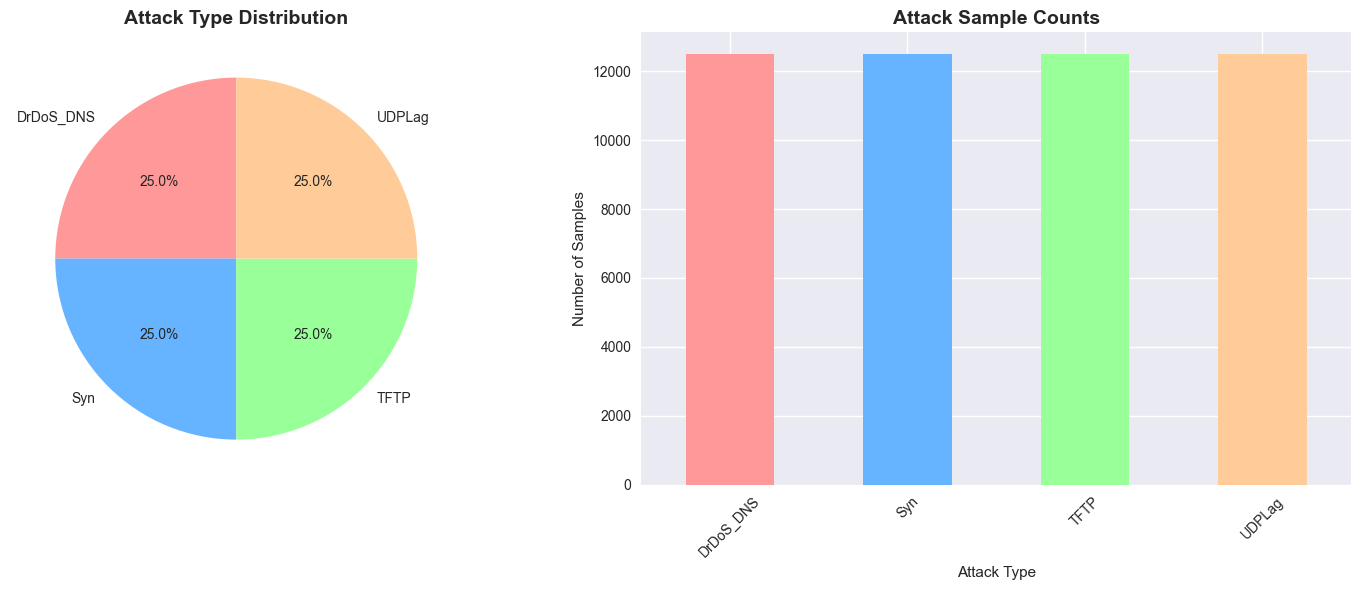

📊 Attack Distribution Analysis:
DrDoS_DNS   : 12,500 samples ( 25.0%)
Syn         : 12,500 samples ( 25.0%)
TFTP        : 12,500 samples ( 25.0%)
UDPLag      : 12,500 samples ( 25.0%)


In [5]:
# Attack Distribution Visualization
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Pie chart for attack distribution
attack_counts = df['Label'].value_counts()
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']

axes[0].pie(attack_counts.values, labels=attack_counts.index, autopct='%1.1f%%', 
           colors=colors, startangle=90)
axes[0].set_title('Attack Type Distribution', fontsize=14, fontweight='bold')

# Bar chart for attack counts
attack_counts.plot(kind='bar', ax=axes[1], color=colors)
axes[1].set_title('Attack Sample Counts', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Attack Type')
axes[1].set_ylabel('Number of Samples')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

print("📊 Attack Distribution Analysis:")
print("=" * 40)
for attack, count in attack_counts.items():
    percentage = (count / len(df)) * 100
    print(f"{attack:12}: {count:6,} samples ({percentage:5.1f}%)")

🏢 Federated Learning Data Distribution Analysis

Client 0:
  Train: 13,000 samples
  Test:  3,250 samples
  Total: 16,250 samples
  Primary attacks: DrDoS_DNS, Syn

Client 1:
  Train: 13,000 samples
  Test:  3,250 samples
  Total: 16,250 samples
  Primary attacks: Syn, TFTP

Client 2:
  Train: 13,000 samples
  Test:  3,250 samples
  Total: 16,250 samples
  Primary attacks: TFTP, UDPLag

Client 1:
  Train: 13,000 samples
  Test:  3,250 samples
  Total: 16,250 samples
  Primary attacks: Syn, TFTP

Client 2:
  Train: 13,000 samples
  Test:  3,250 samples
  Total: 16,250 samples
  Primary attacks: TFTP, UDPLag

Client 3:
  Train: 13,000 samples
  Test:  3,250 samples
  Total: 16,250 samples
  Primary attacks: UDPLag, DrDoS_DNS

Client 3:
  Train: 13,000 samples
  Test:  3,250 samples
  Total: 16,250 samples
  Primary attacks: UDPLag, DrDoS_DNS


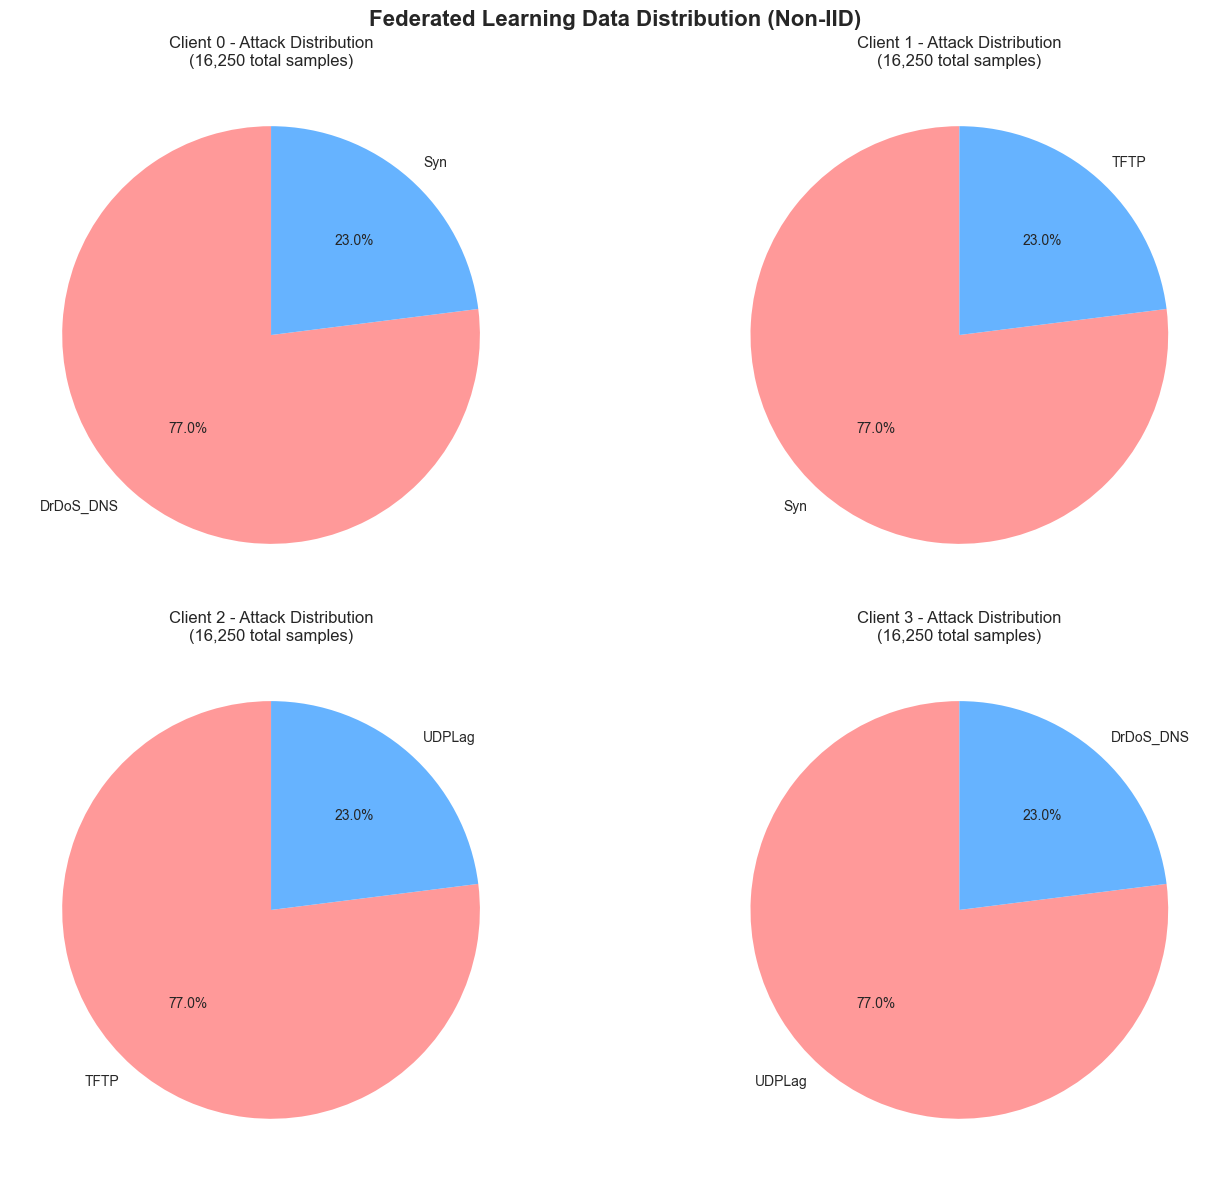


✅ Successfully loaded federated data for 4 clients


In [6]:
# Analyze Federated Data Splits
print("🏢 Federated Learning Data Distribution Analysis")
print("=" * 55)

# Load client data
client_data = {}
for i in range(4):
    train_path = f"../data/optimized/client_{i}_train.csv"
    test_path = f"../data/optimized/client_{i}_test.csv"
    
    if os.path.exists(train_path) and os.path.exists(test_path):
        train_df = pd.read_csv(train_path)
        test_df = pd.read_csv(test_path)
        client_data[i] = {
            'train': train_df,
            'test': test_df,
            'total': len(train_df) + len(test_df)
        }
        
        print(f"\nClient {i}:")
        print(f"  Train: {len(train_df):,} samples")
        print(f"  Test:  {len(test_df):,} samples") 
        print(f"  Total: {client_data[i]['total']:,} samples")
        
        # Show attack distribution for this client
        train_attacks = train_df['Label'].value_counts()
        print(f"  Primary attacks: {', '.join(train_attacks.head(2).index.tolist())}")

# Visualize federated distribution
if client_data:
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    fig.suptitle('Federated Learning Data Distribution (Non-IID)', fontsize=16, fontweight='bold')
    
    for i, ax in enumerate(axes.flat):
        if i in client_data:
            train_attacks = client_data[i]['train']['Label'].value_counts()
            
            # Create pie chart for each client
            ax.pie(train_attacks.values, labels=train_attacks.index, autopct='%1.1f%%',
                  startangle=90, colors=['#ff9999', '#66b3ff', '#99ff99', '#ffcc99'])
            ax.set_title(f'Client {i} - Attack Distribution\n({client_data[i]["total"]:,} total samples)')
    
    plt.tight_layout()
    plt.show()
    
    print(f"\n✅ Successfully loaded federated data for {len(client_data)} clients")
else:
    print("❌ No federated client data found. Please run the optimization script first.")

🔬 Feature Analysis
Analyzing 31 numeric features...

📊 Feature Statistics Summary:
       Flow Duration  Total Fwd Packets  Total Backward Packets  \
count   5.000000e+04          50000.000               50000.000   
mean    3.874402e+06              4.947                   0.249   
std     1.532667e+07            444.126                  17.881   
min     0.000000e+00              1.000                   0.000   
25%     1.000000e+00              2.000                   0.000   
50%     1.000000e+00              2.000                   0.000   
75%     9.300000e+01              2.000                   0.000   
max     1.191115e+08          99302.000                3988.000   

       Total Length of Fwd Packets  Total Length of Bwd Packets  Flow Bytes/s  \
count                    50000.000                 5.000000e+04  5.000000e+04   
mean                      1230.529                 2.289560e+02  6.233746e+08   
std                       2345.748                 4.917136e+04  1.063

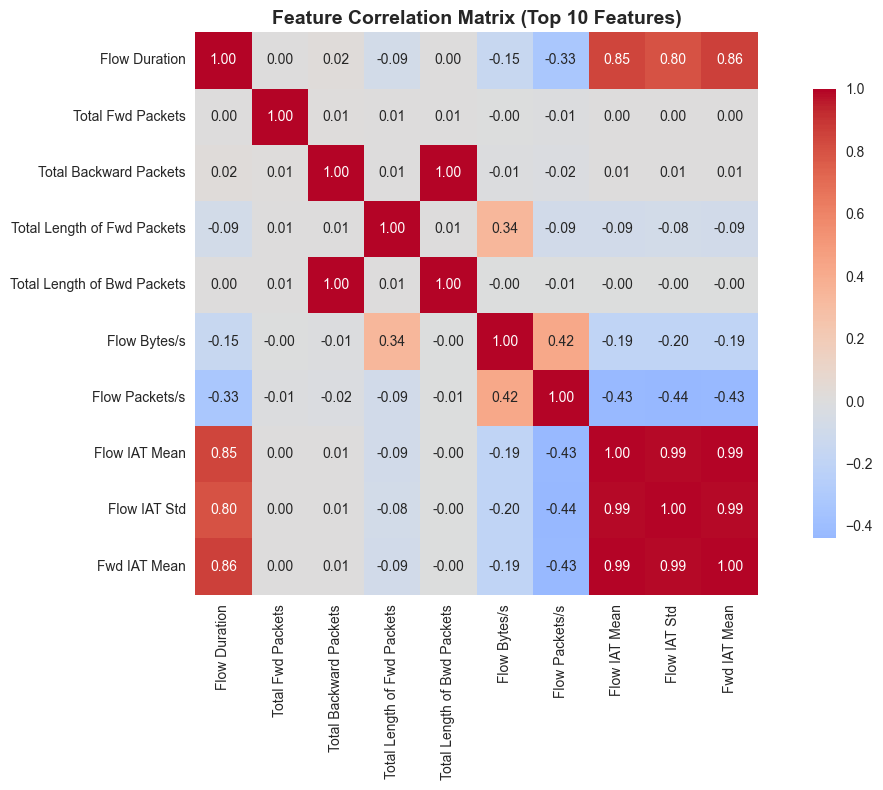


📈 Key Feature Distributions by Attack Type:


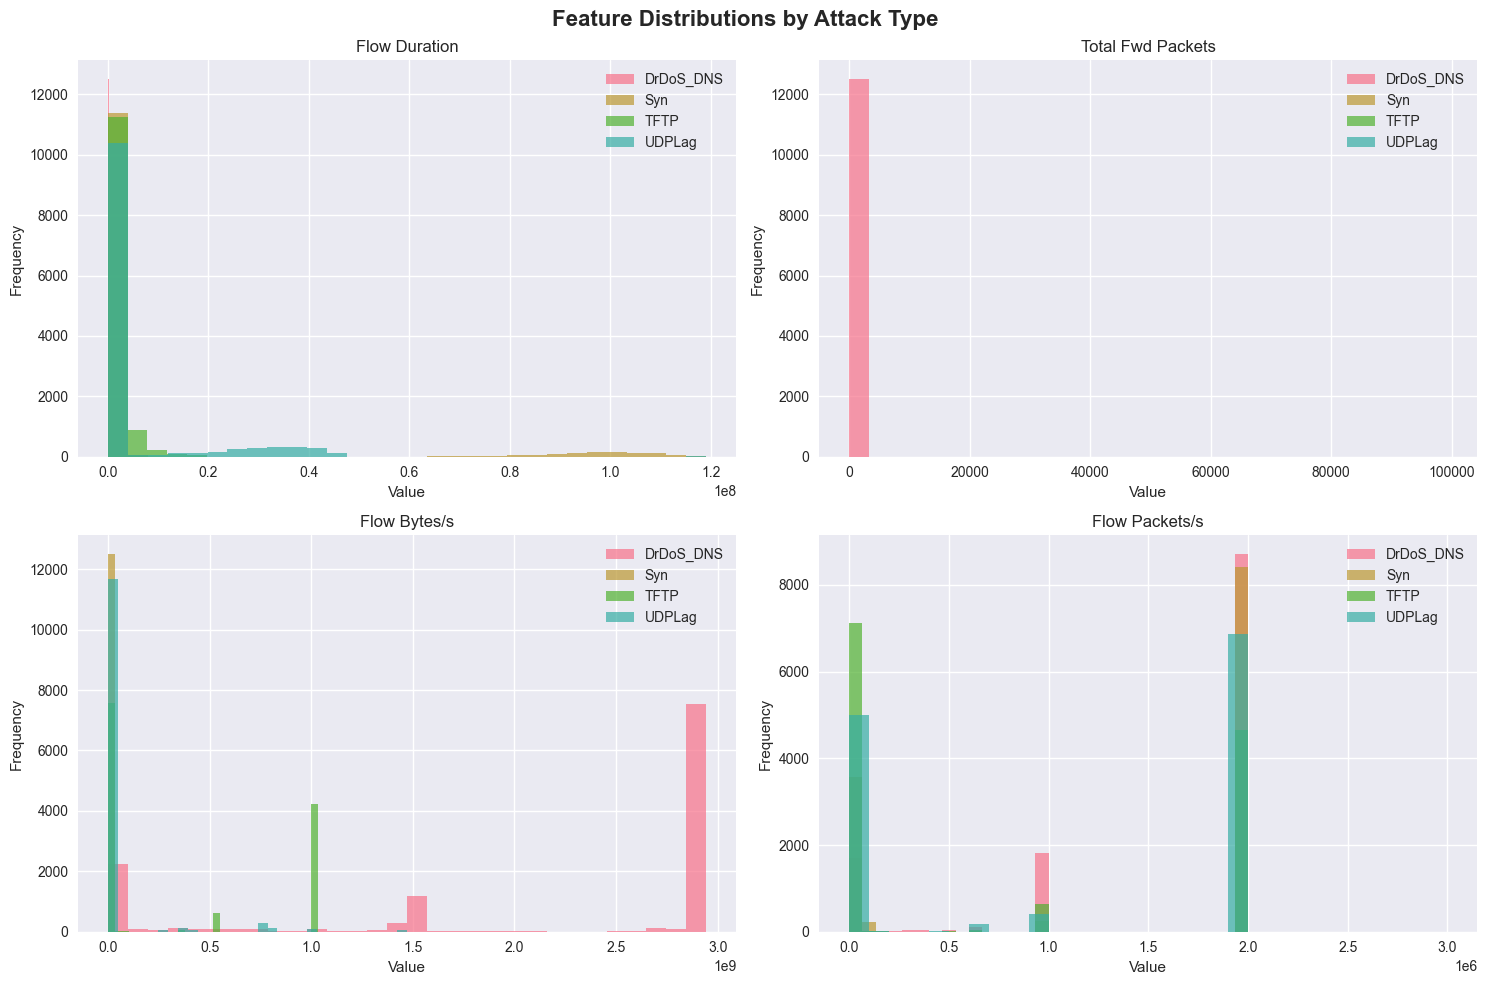


✅ Feature analysis complete!
📊 Dataset is ready for federated learning training!


In [7]:
# Feature Analysis and Visualization
print("🔬 Feature Analysis")
print("=" * 30)

# Get numeric features only
numeric_features = df.select_dtypes(include=[np.number]).columns
feature_cols = [col for col in numeric_features if col not in ['Label', 'Binary_Label']]

print(f"Analyzing {len(feature_cols)} numeric features...")

# Feature statistics
feature_stats = df[feature_cols].describe()
print(f"\n📊 Feature Statistics Summary:")
print(feature_stats.round(3))

# Correlation heatmap for top features
print(f"\n🔥 Top 10 Feature Correlation Analysis:")
top_features = feature_cols[:10]  # First 10 features
corr_matrix = df[top_features].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, 
           square=True, fmt='.2f', cbar_kws={'shrink': 0.8})
plt.title('Feature Correlation Matrix (Top 10 Features)', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Feature distribution by attack type (sample a few key features)
key_features = ['Flow Duration', 'Total Fwd Packets', 'Flow Bytes/s', 'Flow Packets/s']
available_key_features = [f for f in key_features if f in df.columns or f' {f}' in df.columns]

if available_key_features:
    print(f"\n📈 Key Feature Distributions by Attack Type:")
    
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    fig.suptitle('Feature Distributions by Attack Type', fontsize=16, fontweight='bold')
    
    for i, feature in enumerate(available_key_features[:4]):
        ax = axes[i//2, i%2]
        
        # Handle column name variations
        col_name = feature if feature in df.columns else f' {feature}'
        
        if col_name in df.columns:
            for attack in df['Label'].unique():
                attack_data = df[df['Label'] == attack][col_name]
                ax.hist(attack_data, alpha=0.7, label=attack, bins=30)
            
            ax.set_title(f'{feature}')
            ax.set_xlabel('Value')
            ax.set_ylabel('Frequency')
            ax.legend()
    
    plt.tight_layout()
    plt.show()

print(f"\n✅ Feature analysis complete!")
print(f"📊 Dataset is ready for federated learning training!")